In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import operator

In [2]:
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('2', '1', 4),
    ('1', '3', -2),
    ('2', '3', 3),
    ('4', '2', -1),
    ('3', '4', 2)
])

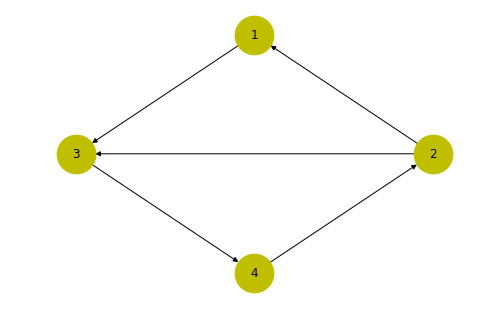

In [3]:
nx.draw_circular(G, with_labels=True, node_size=1500, node_color='y', alpha=1, arrows=True)

In [4]:
def print_distances(distances):
    for key, value in sorted(distances.items(), key=operator.itemgetter(0)):
        print(key, dict(value));
        
def floyd_warshall(G, weight='weight'):
    dist = defaultdict(lambda: defaultdict(lambda: float('inf')))
    pred = defaultdict(dict)
    
    undirected = not G.is_directed()
    
    for v in G:
        dist[v][v] = 0
    
    for i, j, d in G.edges(data=True):
        w = d.get(weight)
        dist[i][j] = w
        pred[i][j] = i
        if undirected:
            dist[j][i] = w
            pred[j][i] = j
            
    for k in G:
        for i in G:
            for j in G:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    pred[i][j] = pred[k][j]
                    
    return dict(pred), dict(dist)


def reconstruct_path(source, target, predecessors):
    if source == target:
        return []
    
    prev = predecessors[source]
    curr = prev[target]
    path = [target, curr]
    
    while curr != source:
        curr = prev[curr]
        path.append(curr)
        
    return list(reversed(path))

In [5]:
predecessors, distances = floyd_warshall(G)

print("\nPredecessors\n", predecessors)

print("\nDistances")
print_distances(distances)
    
path = reconstruct_path('1', '4', predecessors)
print("\nPath\n", path)


Predecessors
 {'2': {'1': '2', '3': '1', '4': '3'}, '1': {'3': '1', '4': '3', '2': '4'}, '3': {'4': '3', '2': '4', '1': '2'}, '4': {'2': '4', '1': '2', '3': '1'}}

Distances
1 {'1': 0, '3': -2, '2': -1, '4': 0}
2 {'2': 0, '1': 4, '3': 2, '4': 4}
3 {'3': 0, '4': 2, '2': 1, '1': 5}
4 {'4': 0, '2': -1, '1': 3, '3': 1}

Path
 ['1', '3', '4']
